# NFL Elimination Picks

reqs:
```
pip install numpy scipy pandas matplotlib parsel
```

In [1]:
import datetime
import math
import random

import matplotlib.pyplot as plt
import numpy as np

In [2]:
#%load_ext autoreload
#%autoreload 2

In [4]:
import anysunday
import anysunday.powercalcs
from anysunday import viz, pick

In [7]:
schedule = anysunday.loaders.espn_schedule("./schedules/2022.espn")

https://www.espn.com/nfl/fpi

In [8]:
powers = anysunday.loaders.espn_powers()
powers

{'BUF': 9.4,
 'GB': 8.8,
 'LAR': 7.7,
 'KC': 7.6,
 'TB': 7.4,
 'DAL': 7.2,
 'LAC': 6.2,
 'IND': 4.2,
 'ARI': 4.1,
 'CLE': 3.5,
 'BAL': 3.3,
 'DEN': 3.3,
 'MIN': 3.2,
 'LV': 2.8,
 'NE': 2.2,
 'CIN': 1.1,
 'TEN': 0.9,
 'PHI': -0.1,
 'NO': -0.9,
 'WSH': -1.5,
 'MIA': -1.6,
 'NYG': -4.1,
 'DET': -4.3,
 'SF': -6.1,
 'CAR': -7.5,
 'PIT': -7.5,
 'SEA': -7.9,
 'JAX': -8.2,
 'ATL': -11.6,
 'HOU': -12.0,
 'NYJ': -12.8,
 'CHI': -13.2}

In [24]:
top_picks = list(powers)[:len(schedule)]
best_pick = None
best_pick_fitness = -100

def fitness(scores):
    return 100 * min(scores) + sum(scores)

def fitness(scores):
    return 50 * (min(scores) - 3) + sum(scores)

picks = []

HOME_POWER_BUMP = 3.0

for n in range(10_000_000):
    this_pick = top_picks[:]
    random.shuffle(this_pick)
    try:
        scores = anysunday.powercalcs.pick_power_calculator(powers, schedule, this_pick)
    except ValueError:
        continue
    
    pick_fitness = fitness(scores)
    
    if pick_fitness < 0:
        continue

    picks.append([min(scores), sum(scores)])
    
    if pick_fitness < best_pick_fitness:
        continue
    
    print("new high score, round {:>9d}, fitness={:+3.1f}".format(n, pick_fitness))
    best_pick = this_pick
    best_scores = scores
    best_pick_fitness = pick_fitness


new high score, round      1022, fitness=+51.0
new high score, round      1641, fitness=+95.0
new high score, round     29653, fitness=+109.6
new high score, round     39340, fitness=+125.1
new high score, round    105641, fitness=+168.0
new high score, round    422707, fitness=+173.6
new high score, round    622554, fitness=+194.3
new high score, round   1375705, fitness=+203.4
new high score, round   1512139, fitness=+232.3
new high score, round   1514228, fitness=+284.7
new high score, round   5673696, fitness=+303.7
new high score, round   9737785, fitness=+306.1


In [25]:
anysunday.powercalcs.pick_power_calculator(powers, schedule, best_pick, verbose=True)

week  1: diff +11.6 - picking CIN (+1.1+H) over PIT (-7.5  )
week  2: diff  +9.4 - picking IND (+4.2  ) over JAX (-8.2+H)
week  3: diff +14.0 - picking CLE (+3.5+H) over PIT (-7.5  )
week  4: diff +15.2 - picking LAC (+6.2  ) over HOU (-12.0+H)
week  5: diff  +5.2 - picking BAL (+3.3+H) over CIN (+1.1  )
week  6: diff  +9.0 - picking ARI (+4.1  ) over SEA (-7.9+H)
week  7: diff  +7.3 - picking GB  (+8.8  ) over WSH (-1.5+H)
week  8: diff +10.4 - picking PHI (-0.1+H) over PIT (-7.5  )
week  9: diff  +8.0 - picking LV  (+2.8  ) over JAX (-8.2+H)
week 10: diff +18.8 - picking KC  (+7.6+H) over JAX (-8.2  )
week 11: diff  +8.9 - picking BUF (+9.4+H) over CLE (+3.5  )
week 12: diff  +7.8 - picking DEN (+3.3  ) over CAR (-7.5+H)
week 13: diff +18.6 - picking LAR (+7.7+H) over SEA (-7.9  )
week 14: diff +12.1 - picking TEN (+0.9+H) over JAX (-8.2  )
week 15: diff  +9.3 - picking TB  (+7.4+H) over CIN (+1.1  )
week 16: diff +10.3 - picking DAL (+7.2+H) over PHI (-0.1  )
week 17: diff  +6.8 - p

[11.6,
 9.399999999999999,
 14.0,
 15.2,
 5.199999999999999,
 9.0,
 7.300000000000001,
 10.4,
 8.0,
 18.799999999999997,
 8.9,
 7.800000000000001,
 18.6,
 12.1,
 9.3,
 10.3,
 6.800000000000001,
 13.399999999999999]

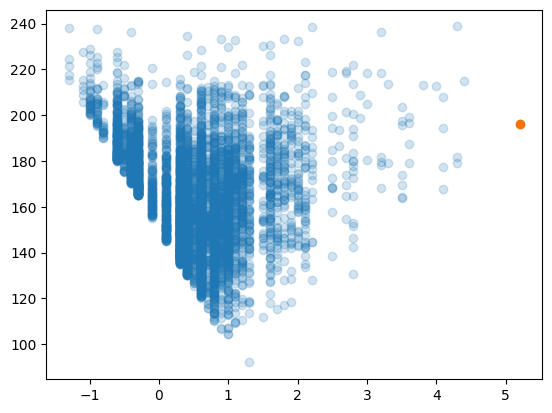

In [26]:
best_scores = anysunday.powercalcs.pick_power_calculator(powers, schedule, best_pick)
best_point = [min(best_scores), sum(best_scores)]

f, ax = plt.subplots()
ax.scatter(*zip(*picks), alpha=0.2)

ax.scatter(*best_point, color="xkcd:orange")

(<Figure size 800x1000 with 2 Axes>,
 <AxesSubplot:xlabel='Week', ylabel='Pick to Win'>)

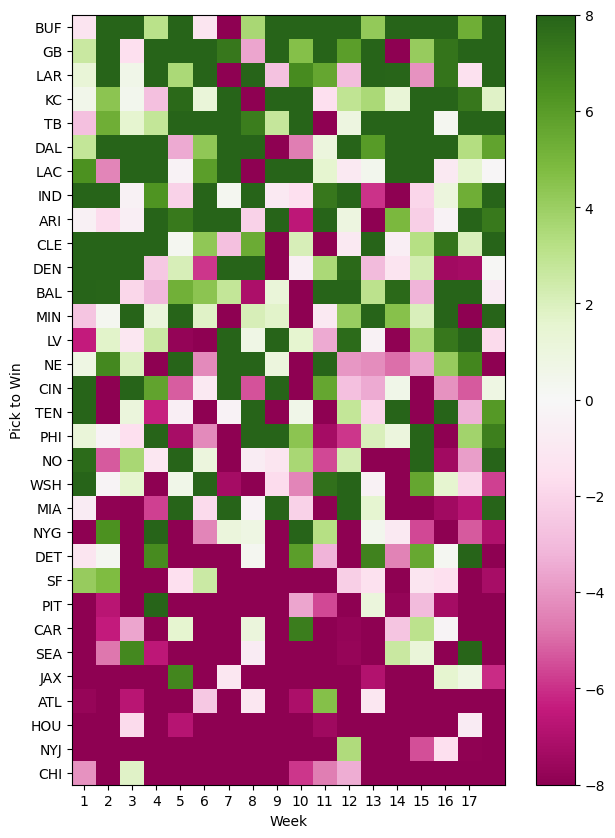

In [12]:
power_rank, matrix = anysunday.powercalcs.pick_grid(powers, schedule, home_bump=3)

viz.plot_matrix(matrix, power_rank)

In [13]:
my_past_picks = [
#     "LAR", # week 1
]

tuned_home_bump = 1.5

ppkwargs = {
    "powers": powers,
    "schedule": schedule,
    "home_bump": tuned_home_bump,
    "past_picks": my_past_picks
}

In [31]:
pp = pick.Permuter(**ppkwargs)

pprev = pick.Permuter(**ppkwargs)
pprev.pick = pprev.reverse_greedy()

pprand = pick.Permuter(**ppkwargs)
pprand.pick = pprand.random_greedy()

pplg = pick.Permuter(**ppkwargs)
pplg.pick = pplg.limited_greedy(limit=8)

In [32]:
pp.describe_pick()

week  1: diff +14.7 - picking IND (+4.2  ) over HOU (-12.0+H)
week  2: diff +23.5 - picking GB  (+8.8+H) over CHI (-13.2  )
week  3: diff +15.9 - picking LAC (+6.2+H) over JAX (-8.2  )
week  4: diff +13.6 - picking CLE (+3.5  ) over ATL (-11.6+H)
week  5: diff +20.5 - picking TB  (+7.4+H) over ATL (-11.6  )
week  6: diff +16.7 - picking LAR (+7.7+H) over CAR (-7.5  )
week  7: diff +17.6 - picking DEN (+3.3+H) over NYJ (-12.8  )
week  8: diff +21.9 - picking DAL (+7.2+H) over CHI (-13.2  )
week  9: diff +20.7 - picking BUF (+9.4  ) over NYJ (-12.8+H)
week 10: diff +17.3 - picking KC  (+7.6+H) over JAX (-8.2  )
week 11: diff +16.5 - picking NE  (+2.2+H) over NYJ (-12.8  )
week 12: diff +11.9 - picking MIA (-1.6+H) over HOU (-12.0  )
week 13: diff +17.5 - picking MIN (+3.2+H) over NYJ (-12.8  )
week 14: diff +10.6 - picking TEN (+0.9+H) over JAX (-8.2  )
week 15: diff +12.2 - picking NO  (-0.9+H) over ATL (-11.6  )
week 16: diff +16.4 - picking BAL (+3.3+H) over ATL (-11.6  )
week 17: dif

In [33]:
pprev.describe_pick()

week  1: diff  +9.2 - picking NO  (-0.9  ) over ATL (-11.6+H)
week  2: diff  +6.4 - picking BAL (+3.3+H) over MIA (-1.6  )
week  3: diff +12.4 - picking CIN (+1.1  ) over NYJ (-12.8+H)
week  4: diff +13.6 - picking CLE (+3.5  ) over ATL (-11.6+H)
week  5: diff +17.9 - picking MIN (+3.2+H) over CHI (-13.2  )
week  6: diff +10.2 - picking WSH (-1.5  ) over CHI (-13.2+H)
week  7: diff +17.6 - picking DEN (+3.3+H) over NYJ (-12.8  )
week  8: diff +15.3 - picking LAR (+7.7+H) over SF  (-6.1  )
week  9: diff +13.5 - picking ARI (+4.1+H) over SEA (-7.9  )
week 10: diff +10.8 - picking LAC (+6.2  ) over SF  (-6.1+H)
week 11: diff +16.5 - picking NE  (+2.2+H) over NYJ (-12.8  )
week 12: diff +11.9 - picking MIA (-1.6+H) over HOU (-12.0  )
week 13: diff +20.5 - picking GB  (+8.8  ) over CHI (-13.2+H)
week 14: diff +20.7 - picking DAL (+7.2+H) over HOU (-12.0  )
week 15: diff +18.1 - picking KC  (+7.6  ) over HOU (-12.0+H)
week 16: diff +21.1 - picking BUF (+9.4  ) over CHI (-13.2+H)
week 17: dif

In [34]:
pprand.describe_pick()

week  1: diff +10.1 - picking CIN (+1.1+H) over PIT (-7.5  )
week  2: diff +23.5 - picking GB  (+8.8+H) over CHI (-13.2  )
week  3: diff +15.9 - picking LAC (+6.2+H) over JAX (-8.2  )
week  4: diff +13.6 - picking CLE (+3.5  ) over ATL (-11.6+H)
week  5: diff +20.5 - picking TB  (+7.4+H) over ATL (-11.6  )
week  6: diff +16.7 - picking LAR (+7.7+H) over CAR (-7.5  )
week  7: diff +17.6 - picking DEN (+3.3+H) over NYJ (-12.8  )
week  8: diff +21.9 - picking DAL (+7.2+H) over CHI (-13.2  )
week  9: diff +20.7 - picking BUF (+9.4  ) over NYJ (-12.8+H)
week 10: diff +17.3 - picking KC  (+7.6+H) over JAX (-8.2  )
week 11: diff +16.5 - picking NE  (+2.2+H) over NYJ (-12.8  )
week 12: diff +11.9 - picking MIA (-1.6+H) over HOU (-12.0  )
week 13: diff +17.5 - picking MIN (+3.2+H) over NYJ (-12.8  )
week 14: diff +10.6 - picking TEN (+0.9+H) over JAX (-8.2  )
week 15: diff +12.2 - picking NO  (-0.9+H) over ATL (-11.6  )
week 16: diff +16.4 - picking BAL (+3.3+H) over ATL (-11.6  )
week 17: diff

In [35]:
pplg.describe_pick()

week  1: diff  +8.2 - picking WSH (-1.5+H) over JAX (-8.2  )
week  2: diff  +8.2 - picking NE  (+2.2  ) over PIT (-7.5+H)
week  3: diff  +9.0 - picking MIN (+3.2+H) over DET (-4.3  )
week  4: diff  +8.1 - picking GB  (+8.8+H) over NE  (+2.2  )
week  5: diff  +8.5 - picking NO  (-0.9+H) over SEA (-7.9  )
week  6: diff +10.5 - picking ARI (+4.1  ) over SEA (-7.9+H)
week  7: diff +12.2 - picking KC  (+7.6  ) over SF  (-6.1+H)
week  8: diff  +8.9 - picking PHI (-0.1+H) over PIT (-7.5  )
week  9: diff  +9.5 - picking LV  (+2.8  ) over JAX (-8.2+H)
week 10: diff  +9.4 - picking NYG (-4.1+H) over HOU (-12.0  )
week 11: diff +12.3 - picking BAL (+3.3+H) over CAR (-7.5  )
week 12: diff  +9.3 - picking DEN (+3.3  ) over CAR (-7.5+H)
week 13: diff  +9.8 - picking TB  (+7.4+H) over NO  (-0.9  )
week 14: diff  +9.3 - picking LAC (+6.2+H) over MIA (-1.6  )
week 15: diff +12.5 - picking BUF (+9.4+H) over MIA (-1.6  )
week 16: diff  +8.8 - picking DAL (+7.2+H) over PHI (-0.1  )
week 17: diff +10.4 - p

In [37]:
best_picks = []
best_fitness = -100
for n in range(10_000_000):
    pprand.pick = pprand.random_greedy()
    
    if pprand.fitness > best_fitness:
        print("new best fitness", int(pprand.fitness))
        best_picks = pprand.pick
        best_fitness = pprand.fitness
        
pprand.pick = best_picks
pprand.describe_pick()

new best fitness 2082191
new best fitness 2798042
new best fitness 2890456
new best fitness 2950775
new best fitness 2975717
new best fitness 3133141
new best fitness 3277198
new best fitness 3283825
new best fitness 3304379
new best fitness 3318515
new best fitness 3357288
week  1: diff +14.6 - picking BAL (+3.3  ) over NYJ (-12.8+H)
week  2: diff +16.8 - picking DEN (+3.3+H) over HOU (-12.0  )
week  3: diff +12.4 - picking CIN (+1.1  ) over NYJ (-12.8+H)
week  4: diff +16.7 - picking LAC (+6.2  ) over HOU (-12.0+H)
week  5: diff +17.9 - picking MIN (+3.2+H) over CHI (-13.2  )
week  6: diff +23.1 - picking GB  (+8.8+H) over NYJ (-12.8  )
week  7: diff +16.3 - picking LV  (+2.8+H) over HOU (-12.0  )
week  8: diff +15.3 - picking LAR (+7.7+H) over SF  (-6.1  )
week  9: diff +20.7 - picking BUF (+9.4  ) over NYJ (-12.8+H)
week 10: diff +16.8 - picking TB  (+7.4+H) over SEA (-7.9  )
week 11: diff +16.5 - picking NE  (+2.2+H) over NYJ (-12.8  )
week 12: diff +13.2 - picking IND (+4.2+H) ov

TO UPDATE

## FiveThirtyEight Elo Data

* Links
    * https://projects.fivethirtyeight.com/2020-nfl-predictions/
    * https://github.com/fivethirtyeight/data/tree/master/nfl-elo
* Important Fields
    * `team1`	Abbreviation for home team
    * `team2`	Abbreviation for away team
    * `qbelo_prob1`	Home team's probability of winning according to quarterback-adjusted Elo
    * `qbelo_prob2`	Away team's probability of winning according to quarterback-adjusted Elo

In [ ]:
data = anysunday.loaders.five38_elos()

In [ ]:
data.shape

In [ ]:
data

In [ ]:
import dateutil.parser

NUM_TEAMS = 32
NUM_WEEKS = len(schedule)

WEEK_1_WED = datetime.datetime(year=2021, month=9, day=8)
TEAM_RENAMES = {
    "OAK": "LV",  # Raiders
}

def date_to_week(date):
    if not isinstance(date, datetime.datetime):
        date = dateutil.parser.parse(date)
    day_diff = (date - WEEK_1_WED) / datetime.timedelta(days=1)
    return int((day_diff // 7) + 1)

def pick_grid_538(data):
    powers = {}
    matches = []
    for _index, row in data.iterrows():
        week = date_to_week(row["date"])
        if week > NUM_WEEKS: 
            break
        for n in "12":
            team = row[f"team{n}"]
            elo = row[f"qbelo{n}_post"]
            p_win = row[f"qbelo_prob{n}"]
            if not math.isnan(elo):
                powers[team] = elo
            matches.append((team, week, p_win))

    index = sorted(powers, key=lambda t: powers[t])
    matrix = [[-10] * NUM_TEAMS for _ in range(NUM_WEEKS)]
    for team, week, p_win in matches:
        matrix[week - 1][index.index(team)] = 20 * (p_win - 0.5)
    
    # 538 uses old names as they have historical(ish) data
    index = [TEAM_RENAMES.get(n, n) for n in index]
    return index, matrix

In [ ]:
index538, matrix538 = pick_grid_538(data)
viz.plot_matrix(matrix538, index538)

In [ ]:
class ProbPickPermuter(pick.Permuter):
    def __init__(self, df, past_picks=None):
        self.past_picks = past_picks or []
        self.n_weeks = NUM_WEEKS

        self.df = df.copy()
        self.df["week"] = self.df["date"].apply(date_to_week)
        
        # ignore postseason games
        self.df = self.df[self.df["week"] <= NUM_WEEKS]
    
        self.grid_index, self.grid = pick_grid_538(self.df)
        
        self.pick = self.greedy()
        
    @property
    def pick_score(self):
        scores = []
        for week in range(NUM_WEEKS):
            pick = self.pick[week]
            pick_index = self.grid_index.index(pick)
            scores.append(self.grid[week][pick_index])
        return scores

In [ ]:
ppp = ProbPickPermuter(data, past_picks=my_past_picks)
ppp.pick = ppp.greedy()
ppp.fitness

In [ ]:
ppp = ProbPickPermuter(data, past_picks=my_past_picks)

best_538_picks = []
best_538_fitness = -100
for n in range(100_000):
    ppp.pick = ppp.random_greedy()
    
    if ppp.fitness > best_538_fitness:
        print("new best fitness", int(ppp.fitness))
        best_538_picks = ppp.pick
        print(" ".join(format(p, ">3s") for p in best_538_picks))
        best_538_fitness = ppp.fitness
        
ppp.pick = best_538_picks
ppp.pick 

In [ ]:
print(" ".join(format(p, ">3s") for p in pprand.pick))
print(" ".join(format(p, ">3s") for p in best_538_picks))